### Training for context==1024

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Necessary Librarires
import numpy as np
import keras
import gzip
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024, 300)         362400    
                                                                 
 dropout (Dropout)           (None, 1024, 300)         0         
                                                                 
 lstm_1 (LSTM)               (None, 1024, 100)         160400    
                                                                 
 dropout_1 (Dropout)         (None, 1024, 100)         0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 553,051
Trainable params: 553,051
Non-trai

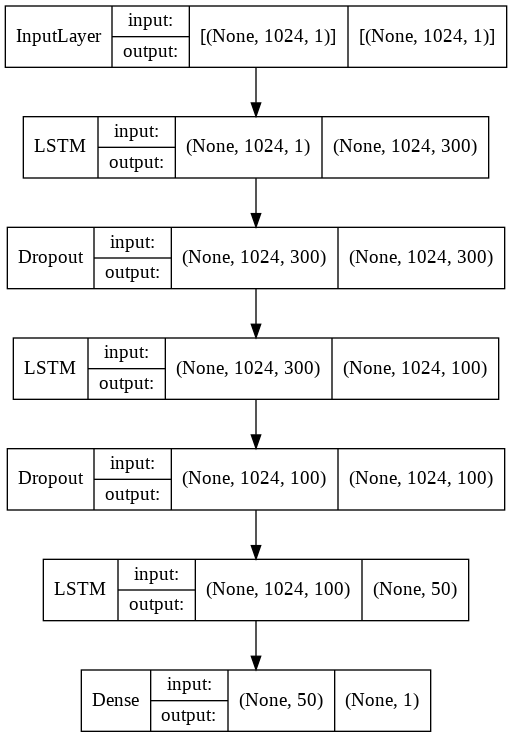

In [ ]:
context=1024
model=Sequential()
model.add(LSTM(units = 300, activation='tanh',return_sequences = True, input_shape = (context, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation='tanh',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh'))
model.add(Dense(units = 1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
file_names="/content/drive/MyDrive/00147_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/00147_batched.pkl", allow_pickle=True)
train=data[0][:100000]
context=1024
train_gen = TimeseriesGenerator(train ,train, length=context, batch_size=32)

In [ ]:
model.fit_generator(train_gen, epochs=1, verbose=1)
model.save("/content/drive/MyDrive/s1.h5")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


3093/3093 [==============================] - 2286s 736ms/step - loss: 0.0019


In [ ]:
file_names="/content/drive/MyDrive/00079_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/00079_batched.pkl", allow_pickle=True)
train=data[0][:100000]
context=1024
train_gen = TimeseriesGenerator(train ,train, length=context, batch_size=32)
model.fit_generator(train_gen, epochs=1, verbose=1)
model.save("/content/s1.h5")

file_names="/content/drive/MyDrive/10999_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/10999_batched.pkl", allow_pickle=True)
train=data[0][:100000]
context=1024
train_gen = TimeseriesGenerator(train ,train, length=context, batch_size=32)
model.fit_generator(train_gen, epochs=1, verbose=1)
model.save("/content/s1.h5")


file_names="/content/drive/MyDrive/00009_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/00009_batched.pkl", allow_pickle=True)
train=data[0][:100000]
context=1024
train_gen = TimeseriesGenerator(train ,train, length=context, batch_size=32)
model.fit_generator(train_gen, epochs=1, verbose=1)
model.save("/content/s1.h5")

file_names="/content/drive/MyDrive/00013_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/00013_batched.pkl", allow_pickle=True)
train=data[0][:100000]
context=1024
train_gen = TimeseriesGenerator(train ,train, length=context, batch_size=32)
model.fit_generator(train_gen, epochs=1, verbose=1)
model.save("/content/s1.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


3093/3093 [==============================] - 2272s 735ms/step - loss: 8.4327e-04


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


3093/3093 [==============================] - 2269s 734ms/step - loss: 476.4047


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


3093/3093 [==============================] - 2271s 734ms/step - loss: 0.0090


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


3093/3093 [==============================] - 2265s 732ms/step - loss: 0.0036


In [ ]:
model.save("/content/drive/MyDrive/s1024.h5")

### Testing With Context==1024

In [2]:
# Imports
import os
import gzip
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras import models 
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import load_model
model=load_model("/content/drive/MyDrive/s1024.h5")

In [5]:
file_names="/content/drive/MyDrive/10951_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/10951_batched.pkl", allow_pickle=True)
context=1024
x=np.random.randint(50)
y=np.random.randint(1000000)
test=data[x][y:y+48000]
test_gen = TimeseriesGenerator(
            test, test, length=context, batch_size=64)
pred=model.predict(test_gen,verbose=1)

#Mean Absolute error
abs_error=0
for i in range (0,len(pred)):
  abs_error+=abs(pred[i]-test[i+context])

MAE=abs_error/len(pred)

print(MAE)

734/734 [==============================] - 55s 74ms/step
[0.04565581]


In [6]:
file_names="/content/drive/MyDrive/07930_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/07930_batched.pkl", allow_pickle=True)
context=1024
x=np.random.randint(50)
y=np.random.randint(1000000)
test=data[x][y:y+48000]
test_gen = TimeseriesGenerator(
            test, test, length=context, batch_size=64)
pred=model.predict(test_gen,verbose=1)

#Mean Absolute error
abs_error=0
for i in range (0,len(pred)):
  abs_error+=abs(pred[i]-test[i+context])

MAE=abs_error/len(pred)
print(MAE)



734/734 [==============================] - 54s 73ms/step
[0.06485543]


In [7]:
file_names="/content/drive/MyDrive/08048_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/08048_batched.pkl", allow_pickle=True)
context=1024
x=np.random.randint(50)
y=np.random.randint(1000000)
test=data[x][y:y+48000]
test_gen = TimeseriesGenerator(
            test, test, length=context, batch_size=64)
pred=model.predict(test_gen,verbose=1)

#Mean Absolute error
abs_error=0
for i in range (0,len(pred)):
  abs_error+=abs(pred[i]-test[i+context])

MAE=abs_error/len(pred)
print(MAE)



734/734 [==============================] - 53s 72ms/step
[0.07734504]


In [8]:
file_names="/content/drive/MyDrive/08622_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/08622_batched.pkl", allow_pickle=True)
context=1024
x=np.random.randint(50)
y=np.random.randint(1000000)
test=data[x][y:y+48000]
test_gen = TimeseriesGenerator(
            test, test, length=context, batch_size=64)
pred=model.predict(test_gen,verbose=1)

#Mean Absolute error
abs_error=0
for i in range (0,len(pred)):
  abs_error+=abs(pred[i]-test[i+context])

MAE=abs_error/len(pred)
print(MAE)



734/734 [==============================] - 53s 72ms/step
[0.03378239]


In [9]:
file_names="/content/drive/MyDrive/09014_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/09014_batched.pkl", allow_pickle=True)
context=1024
x=np.random.randint(50)
y=np.random.randint(1000000)
test=data[x][y:y+48000]
test_gen = TimeseriesGenerator(
            test, test, length=context, batch_size=64)
pred=model.predict(test_gen,verbose=1)

#Mean Absolute error
abs_error=0
for i in range (0,len(pred)):
  abs_error+=abs(pred[i]-test[i+context])

MAE=abs_error/len(pred)
print(MAE)



734/734 [==============================] - 53s 72ms/step
[0.05566421]
